<a href="https://colab.research.google.com/github/nrajmalwar/Project/blob/master/Session%203/Assignment_3_EVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nishad Rajmalwar, Batch F6, nrajmalwar@gmail.com

# **Import Libraries and modules**

Install and import keras library

In [0]:
# https://keras.io/
!pip install -q keras
import keras

Important important APIs, functions and libraries

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D, GlobalAveragePooling2D, BatchNormalization
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.datasets import mnist
from keras.models import load_model
from keras.callbacks import ModelCheckpoint

### Load pre-shuffled MNIST data into train and test sets

Load and split the data into training and test set

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Print the shape of X_train (examples of the dataset) and plot the first image

(60000, 28, 28)


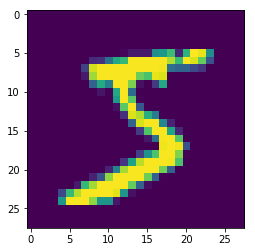

In [23]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

Reshape the X_train and X_test to (m,  28, 28, 1) tensor

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Change the values of X_train, X_test to float32 and normalize them between 0 and 255

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Print the first 10 elements of y_train which contains the class labels for X_train

In [26]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

Convert the values of Y_train and Y_test to one-hot vectors

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [28]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

#Model Building

Build a simple convolution model

In [43]:
model = Sequential()

model.add(Convolution2D(16, 3, 3, activation='relu', input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(16, 1, activation='relu'))
model.add(BatchNormalization())

model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(rate=0.3))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Convolution2D(16, 1, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.2))

model.add(Convolution2D(32, 3, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(rate=0.5))

model.add(Convolution2D(10, 3, 3))

model.add(Flatten())
model.add(Activation('softmax'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3))`


Print the model summary

In [44]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_13 (Batc (None, 26, 26, 16)        64        
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 24, 24, 32)        4640      
_________________________________________________________________
batch_normalization_14 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 12, 12, 16)        528       
_________________________________________________________________
batch_normalization_15 (Batc (None, 12, 12, 16)        64        
__________

Compile the model with the loss function, the optimizer and the metrics used

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

#Model Training

Fit the model on X_train and Y_train for 50 epochs with a batch size of 32

In [47]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=32, nb_epoch=50, verbose=1)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
  352/60000 [..............................] - ETA: 24s - loss: 0.0394 - acc: 0.9858

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


60000/60000 [==============================] - 23s 376us/step - loss: 0.0230 - acc: 0.9923 - val_loss: 0.0264 - val_acc: 0.9914
Epoch 2/50
60000/60000 [==============================] - 22s 361us/step - loss: 0.0222 - acc: 0.9924 - val_loss: 0.0248 - val_acc: 0.9919
Epoch 3/50
60000/60000 [==============================] - 22s 362us/step - loss: 0.0222 - acc: 0.9926 - val_loss: 0.0225 - val_acc: 0.9928
Epoch 4/50
60000/60000 [==============================] - 22s 372us/step - loss: 0.0225 - acc: 0.9927 - val_loss: 0.0224 - val_acc: 0.9933
Epoch 5/50
60000/60000 [==============================] - 22s 366us/step - loss: 0.0214 - acc: 0.9930 - val_loss: 0.0222 - val_acc: 0.9927
Epoch 6/50
60000/60000 [==============================] - 22s 359us/step - loss: 0.0224 - acc: 0.9924 - val_loss: 0.0216 - val_acc: 0.9931
Epoch 7/50
60000/60000 [==============================] - 22s 361us/step - loss: 0.0217 - acc: 0.9930 - val_loss: 0.0237 - val_acc: 0.9921
Epoch 8/50
60000/60000 [==============

In [58]:
checkpoint = ModelCheckpoint('EVA_Asgn_3.hdf5', monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=32, nb_epoch=10, verbose=1, callbacks=[checkpoint])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 23s 387us/step - loss: 0.0158 - acc: 0.9947 - val_loss: 0.0187 - val_acc: 0.9950

Epoch 00001: val_acc improved from -inf to 0.99500, saving model to EVA_Asgn_3.hdf5
Epoch 2/10
60000/60000 [==============================] - 21s 356us/step - loss: 0.0163 - acc: 0.9945 - val_loss: 0.0231 - val_acc: 0.9937

Epoch 00002: val_acc did not improve from 0.99500
Epoch 3/10
60000/60000 [==============================] - 21s 358us/step - loss: 0.0163 - acc: 0.9947 - val_loss: 0.0248 - val_acc: 0.9934

Epoch 00003: val_acc did not improve from 0.99500
Epoch 4/10
60000/60000 [==============================] - 24s 397us/step - loss: 0.0159 - acc: 0.9948 - val_loss: 0.0246 - val_acc: 0.9932

Epoch 00004: val_acc did not improve from 0.99500
Epoch 5/10
60000/60000 [==============================] - 21s 355us/step - loss: 0.0143 - acc: 0.9951 - val_loss: 0.0240 - val_acc: 0.9931

Epoch 00005: val

#Model Evaluation

Evaluate the model on the test set

In [0]:
model = load_model('EVA_Asgn_3.hdf5')

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

Print the evaluation score of the model

In [61]:
print(score)

[0.018654734946789268, 0.995]


#Model Prediction

Use the model to predict the class labels of test set

In [0]:
y_pred = model.predict(X_test)

Compare the predicted values and the actual values

In [63]:
print(y_pred[:9])
print(y_test[:9])

[[1.3938881e-13 3.2805868e-08 1.2575283e-09 1.6513794e-09 1.0992509e-12
  5.1327063e-12 1.3785669e-16 1.0000000e+00 1.9311967e-12 8.0911999e-10]
 [2.1244016e-06 1.7004730e-06 9.9999619e-01 2.4682756e-09 3.4051074e-12
  4.5700152e-14 3.7576047e-08 8.7569546e-10 9.3227558e-11 4.5405547e-13]
 [2.0235691e-09 9.9999917e-01 3.7524625e-10 2.1009878e-08 1.9489747e-07
  3.3210324e-07 8.0033303e-08 2.2239297e-07 5.0332618e-09 3.8962638e-09]
 [9.9998105e-01 8.9114643e-10 1.6176716e-07 2.6985013e-08 2.1256320e-10
  7.0233177e-08 1.8491966e-05 4.1854917e-10 1.2604353e-07 4.5777764e-08]
 [1.6581437e-14 9.4333187e-12 1.6870803e-12 1.7189436e-13 9.9999905e-01
  2.2928946e-13 8.7677660e-12 7.9479557e-12 2.0790804e-10 9.3995146e-07]
 [5.3802240e-10 9.9999964e-01 4.7094462e-10 3.1427913e-10 1.1813990e-07
  1.7574880e-09 1.4639428e-08 1.7711034e-07 4.9483262e-09 3.8749954e-09]
 [6.9813309e-14 3.4004280e-08 2.6587640e-11 2.9060321e-13 9.9999225e-01
  3.3112421e-10 4.7572488e-11 1.3340268e-08 1.1719636e-06 

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [38]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_25'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()

KeyError: ignored